# Notes

Different problems give different number of points: 2, 3 or 4.

Please, fill `STUDENT` variable with your name, so that we call collect the results automatically. Each problem contains specific validation details. We will do our best to review your assignments, but please keep in mind, that for this assignment automatic grade (between $0$ an $1$) is the primary source of ground truth.

In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
import numpy as np
import torch

In [4]:
STUDENT = "Yehoshua Friedman"
ASSIGNMENT = 3
TEST = False

In [5]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 11

# Basic PyTorch

### 1. ReLU activation (2 points).

ReLU is the most commonly used activation function in many deep learning application. It's defined as

$$
ReLU(x) = \max(0, x).
$$

Outpu must be of the same shape as input, and **will be tested against three random combinations of input array dimensions ($100 \leq n < 1000 $)**, while values of the input are drawn from standard normal distribution. Number of dimensions of the input will also be selected randomly and is either 1, 2 or 3.

For many reasons, ReLU is better than the sigmoid function, as it is simple and consists of simple computation, therefore taking less time to run. Additionally, sigmoid (and tanh) saturate, which does inneficient things to the gradients. ReLU, however, doesn't ave a plateuing slope, and therefore converges faster.

 https://www.mygreatlearning.com/blog/relu-activation-function/

In [6]:
def relu(arr):
    tens = torch.tensor(arr, dtype = torch.float)
    tens[tens<=0] = 0
    return tens #np.maximum(arr, 0)

In [7]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, relu)

### 2. Mean squared error (2 points).

In this problem you need to calculate MSE for a pair of tensors `y_true` and `y_pred`. MSE is defined as usual:

$$
L_{MSE} = \frac{1}{N} \sum_i \left(y_i - \hat y_i\right)^2
$$

Note, however, that `y_true` and `y_pred`may be of **different shape**. While `y_true` is always $(N,)$, `y_pred` may be $(N,1)$, $(1, N)$ or $(N,)$. Input values are drawn from standard normal distribution and **shape is selected randomly ($100 \leq n < 1000 $)**.

In [117]:
def mse(y_true, y_pred):
        return ((y_true - y_pred.reshape(y_true.shape))**2).float().mean()
        # (y_true - y_pred.flatten()).pow(2).mean()
        

In [123]:
# def generate_db(N):
#     arr = torch.randint(0,5, size = (N,))
#     print('arr:' , arr)
#     print('arrn1', arr.reshape(N,1))
#     print('arrn1, reshaped:', arr.reshape(N,1).reshape(arr.shape))
#     print('arr1n:', arr.reshape(1,N))
#     return arr, arr.reshape(N,1), arr.reshape(1,N), torch.randint(0,5, size =(N,))

# torch.manual_seed(7)
# yn, yn1, y1n, y_true = generate_db(4)

# print(y_true)
# print(mse(y_true,yn))
# print(mse(y_true,yn1))
# print(mse(y_true,y1n))

arr: tensor([0, 2, 1, 1])
arrn1 tensor([[0],
        [2],
        [1],
        [1]])
arrn1, reshaped: tensor([0, 2, 1, 1])
arr1n: tensor([[0, 2, 1, 1]])
tensor([3, 2, 2, 4])
tensor(4.7500)
tensor(4.7500)
tensor(4.7500)


In [119]:
PROBLEM_ID = 2

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, mse)

### 3. Character-level encoding (4 points).

In computations in general and in machine learning specifically letters cannot be used directly, as computers only know aboun numbers. Text data may be encoded in many different ways in natural language processing tasks.

One of the simplest ways to encode letters is to use one-hot encoded representation, with letters being "class labels". A letter is represented by a tensor of shape $(26,)$.

Then, for example, word "python" would be transformed into a tensor of shape $(6, 26)$ with all elements being $0$, except $(0, 15)\sim p , \,(1, 24)\sim y ,  \,(2, 19)\sim t,...$ being $1$. A phrase would be represented with 3-dimensional tensor.

In this problem you need to create a tensor, which represents a list of words `words` of length $N$. The only characters used are those from `string.ascii_lowercase`, and words are of different length $L_i$. Output must be of shape $(N, \max(L_i), 26)$.

Dimension 0 corresponds to words themselves, with `tensor[0]` being a represetation of `words[0]`. Note, that you need to use padding: although trivial in this case, you must remember, that tensor must accomodate for a longest word, thus dimension 1 is $\max(L_i)$.

Note also, that the only loop you need here is a loop over `words`, there's no need to loop over the resulting tensor.

The result will be tested against three predefined lists of word, with all words being lowercase and containing only ASCII characters.

In [29]:
def encode(words):
    max_word = max([len(x) for x in words])
    tensor = torch.zeros(size = ((len(words), max_word, 26)))
    
    for word_index, word in enumerate(words):
        for letter_index, letter in enumerate(word):
            abc_index = ord(letter)-97 #ascii value of a = 97. a-97 = 0, the index. Any letter - 0 gives the index
            tensor[word_index, letter_index, abc_index] = 1
    return tensor
# from string import ascii_lowercase
# words = ['python', 'abc', 'acdf']
# max_word = max([len(x) for x in words])

# tensor = torch.zeros(size = ((len(words), max_word, 26)))
# for word_index, word in enumerate(words):
#     for letter_index, letter in enumerate(word):
#         for abc_index, abc in enumerate(ascii_lowercase):
#             if letter == abc:
#                 tensor[word_index,letter_index,abc_index] = 1
# tensor

In [30]:
# words = ['python', 'abc', 'acdf']


# def encode(words):
#     max_word = max([len(x) for x in words])
#     tensor = torch.zeros(size = ((len(words), max_word, 26)))
    
#     for word_index, word in enumerate(words):
#         for letter_index, letter in enumerate(word):
#             abc_index = ord(letter)-97 #ascii value of a = 97. a-97 = 0, the index. Any letter - 0 gives the index
#             tensor[word_index, letter_index, abc_index] = 1
#     return tensor

# print(encode(words)[1])

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])


In [31]:
PROBLEM_ID = 3

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, encode)

# Gradients

### 4. Generate gradient (1 point).

For 2-dimensional tensor `tr`, calculate a gradient of $\sum\log tr_{ij}$. Note, that you're provided with dimensions and interval, and not the `tr` inself:

- `dims` is a tuple, so that `tr.size()` equals `dims`,
- `lims` is an interval, so that elements of `tr` are integers, uniformly sampled from `[lims[0], lims[1])` interval (note, that lims[1] is **not** included).

Result must be a tensor of the same shape as `tr` (namely, `dims`), containing gradients of the following function:

$$\sum_{ij}\log tr_{ij}.$$

and generated `tr` itself.

Result **will be tested against multiple random combinations of input tensor dimensions ($10 \leq n < 100 $) and sampling interval (`lims[0]=1`, `10 <= lims[1] < 100`)**.

**Hint**: think on how you can validate the solution yourself, given that gradient can be computed manually on paper.

In [58]:
torch.manual_seed(8)
def generate_grad(dims, lims):
    """Generate gradient of `log(x)`."""
    # generate tr first
    tr = torch.randint(lims[0], lims[1], size = dims, dtype= torch.float, requires_grad= True)
    # gradient calculation
    funct = tr.log().sum()
    funct.backward()
    return tr.grad, tr

In [129]:
# dims = (2,3)
# lims = [1,10]

# torch.manual_seed(8)
# def generate_grad(dims, lims):
#     """Generate gradient of `log(x)`."""
#     # generate tr first
#     tr = torch.randint(lims[0], lims[1], size = dims, dtype= torch.float, requires_grad= True)
#     # gradient calculation
#     funct = tr.log().sum()
#     funct.backward()
#     print(tr.log(), tr.log().sum())
#     return tr.grad, tr
# generate_grad(dims, lims)

tensor([[0.0000, 1.6094, 0.0000],
        [1.3863, 2.0794, 1.6094]], grad_fn=<LogBackward>) tensor(6.6846, grad_fn=<SumBackward0>)


(tensor([[1.0000, 0.2000, 1.0000],
         [0.2500, 0.1250, 0.2000]]),
 tensor([[1., 5., 1.],
         [4., 8., 5.]], requires_grad=True))

In [33]:
PROBLEM_ID = 4

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, generate_grad)

#### Comment and review

Gradient for the function we use can be calculated analytically:

$$
\frac{\partial}{\partial x_{km}}\sum_{ij}\log x_{ij}
= \sum_{ij} \frac{\partial}{\partial x_{km}} \log x_{ij}
= \sum_{ij} \frac{\delta_{ik}\delta_{jm}}{x_{ij}}
= \frac{1}{x_{km}}
$$

We can now easily check, if gradient is correct by modifying the function we use:

### 5. Find a minimum (2 points, manually graded).

Consider the following scalar function:

$$
f(x) = ax^2 + bx + c
$$

Given the $a,b,c$, find $x$, which minimizes $f(x)$. Note this:

- $a,b,c$ are fixed, and generated in such a way, that minimum always exists ($f(x)$ is convex),
- $x$ is a scalar value, i.e. 0-dimensional tensor.

**Hint:** stop for a second to think about which tensor must contain `requires_grad` and on which scalar should `.backward()` be called.

In [131]:
def generate_coeffs():
    a = torch.rand(size=()) * 10
    b = -10 + torch.rand(size=()) * 10
    c = -10 + torch.rand(size=()) * 10
    return a, b, c

def func(x, a, b, c):
    return x.pow(2) * a + x * b + c


In [134]:
torch.manual_seed(4)
EPOCHS = 20
LR = 1e-1
STARTING_VAL = -5. # Consider choosing different starting values for x to speed-up the optimization
DELTA = 0.00001


# Initialize x, a, b, c
x = torch.tensor(STARTING_VAL, dtype=float, requires_grad= True)
a, b, c = generate_coeffs()
# Collect f(x) values during training for visuzalition later on
f_vals = []

for i in range(EPOCHS):
    # print('x:', x)
    funct = func(x,a,b,c)
    funct.backward()
    # print('grad:', x.grad)
    f_vals.append(funct.item())
    with torch.no_grad(): #context manager, saying to torch that this is just an update step, and we dont need to record it.
        #                  Do to not keep track of it for gradient computations.
        x.sub_(LR * x.grad) #Subtract LR*the gradient from W (if a negative number then add).
    x.grad.zero_()
    print(f"Epoch {i}: loss = {f_vals[-1]}")
    
    try:
        if f_vals[-2] - f_vals[-1] < 0.01: #If loss isnt improved anymore, then break out of the function
            break
    except:
        pass
# if (x.grad is not None):
#         x.grad.data.zero_()
#     # calculate grad    
#     g = func(x,a,b,c)
#     g.backward()
#     # take step the size of LR against the gradient
#     x.data  = x.data - LR*x.grad.data


#     f_vals.append(func(x.data,a,b,c))

print(x)


Epoch 0: loss = 152.86959552764893
Epoch 1: loss = -7.637350365639199
Epoch 2: loss = -9.92089044240806
Epoch 3: loss = -9.95337847744722
Epoch 4: loss = -9.953840686291919
tensor(0.3941, dtype=torch.float64, requires_grad=True)


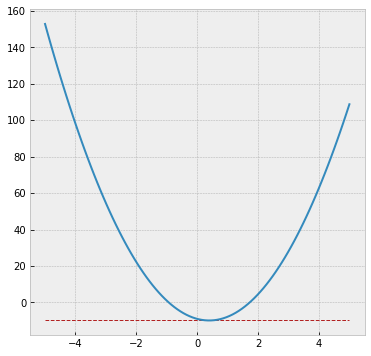

In [36]:
if f_vals:
    grid = np.linspace(-5, 5, 100)
    plt.plot(grid, np.square(grid) * a.item() + grid * b.item() + c.item())
    plt.hlines(f_vals[-1], -5, 5, "firebrick", "--", linewidth=1)

In [37]:
PROBLEM_ID = 5
GRADE = 0

if TEST:
    total_grade += GRADE

In [38]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")